# Introduction to Data Science
## Homework 5

Student Name: Yuqi Dai

Student Netid: yd735
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

Answer here!
1. The probability of a certain class occuring given a set of feature is propotional to the product of the conditional probability of occurance of event (feature) given that certain class. The Laplace can solve the zero count problem. When we apply Laplace smoothing, the zero probability due to count(ei,c)=0 is changed to a small value and when the count(c) and count(ei,c) is large, the smoothing does not significantly affect the result. The smoothing can successfully prevent the overfitting problem caused by zero count and thus reduces the variance of model at cost of increase of bias. 
2. For example, if a event 1 does not exist given class 1, then count(e1,c1)=0 and causes the posterior estimate P(c|E) to be 0 which does not make any sense and the process is failing. It is more apporpriate to conclude that the probability is low in this case. 

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [2]:
import pandas as pd
df=pd.read_csv('/Users/yuqidai/Downloads/imdb.csv')
df.head(5)

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [3]:
# Code here
df['Class']=pd.get_dummies(df['Class'])['P']

In [4]:
df.head(5)

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [5]:
#Code here
X=df['Text']
Y=df['Class']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
CV=CountVectorizer(stop_words='english',binary=True,ngram_range=(1,2))
TV=TfidfVectorizer(stop_words='english',binary=True,ngram_range=(1,2))
CV.fit(X_train)
TV.fit(X_train)
X_train_cv=CV.transform(X_train)
X_test_cv=CV.transform(X_test)
X_train_tv=TV.transform(X_train)
X_test_tv=TV.transform(X_test)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [8]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

Text(0.5,1,'Receiver operating characteristic')

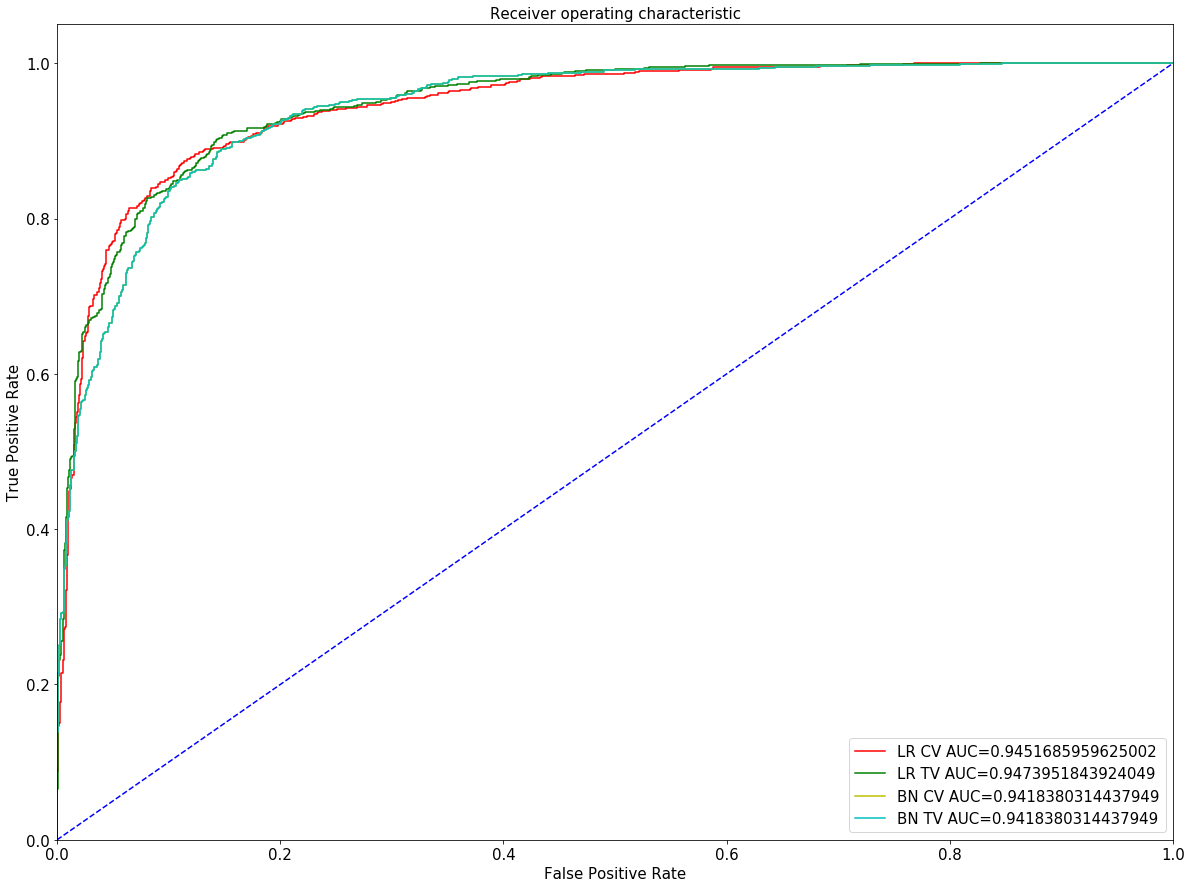

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
LR=LogisticRegression()
BN=BernoulliNB()

LR.fit(X_train_cv,y_train)
fpr1,tpr1,threshold1=roc_curve(y_test,LR.predict_proba(X_test_cv)[:,1])
auc1=auc(fpr1,tpr1)

LR.fit(X_train_tv,y_train)
fpr2,tpr2,threshold2=roc_curve(y_test,LR.predict_proba(X_test_tv)[:,1])
auc2=auc(fpr2,tpr2)

BN.fit(X_train_cv,y_train)
fpr3,tpr3,threshold3=roc_curve(y_test,BN.predict_proba(X_test_cv)[:,1])
auc3=auc(fpr3,tpr3)

BN.fit(X_train_tv,y_train)
fpr4,tpr4,threshold4=roc_curve(y_test,BN.predict_proba(X_test_tv)[:,1])
auc4=auc(fpr4,tpr4)

fig=plt.figure()
fig.set_size_inches(20,15)

plt.plot(fpr1,tpr1,'r',label='LR CV AUC={}'.format(auc1))
plt.plot(fpr2,tpr2,'g',label='LR TV AUC={}'.format(auc2))
plt.plot(fpr3,tpr3,'y',label='BN CV AUC={}'.format(auc3))
plt.plot(fpr4,tpr4,'c',label='BN TV AUC={}'.format(auc4))
plt.plot([0, 1], [0, 1], 'b', linestyle='--')
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver operating characteristic',fontsize=15)
# Code here

Explanation here!

The Logistic Regression with TF-IDF vectorizor did better job since it AUC score is higher than the rest. Logistic Regression is better than BernoulliNB because BernoulliNB assumes the independence of input but words in the lesreview are not independent certainly. Then TF-IDF vectorizor did better job than Count vectorizor because CV just take the occurance of word in the single review but TF-IDF compare it to the occurance of word in the whole dataset. So the result is less biased in TF-IDF and the performance is better.


Extra Credit:
The AUC score of BernoulliNB model with countvectorizor and BernoulliNB model with TF-IDF vectorizor are totally identical. Since for BernoulliNB model, it only take two kinds of input 0 and 1, and if it receives any non-zero number that is not one, it will regard it as a one. Thus, for BernoulliNB model with TF-IDF vectorizor, the non-zero inputs are treated as one so the input is exactly the same as that of BernoulliNB model with countvectorizor. So these two model perform identically.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [55]:
# Code here to display 5 incorrect reviews.
prediction=LR.predict(X_test_tv)
wrong=[]
for i in range(len(prediction)):
    if prediction[i]==0 and y_test.values[i]==1:
        wrong.append(y_test.index[i])

In [64]:
for i in wrong[1:6]:
    print(df['Text'][i]+'\n')

'I feel very sorry for people who go to movies with a pad and pencil to write down flaws and keep notes on how bad a movie is. I feel equally contempt for people who go to movies and CANT suspend reality and/or let themselves enjoy 90 minutes aways from their boring or busy lives! Get a GRIP people. ECGTB is a very ENTERTAINING movie. If you take movies seriously this is NOT for you. If you are expecting the movie to resemble the book in ANY way this is not for you. But if you enjoyed the utter hilarity of Priscilla Queen of the Desert or the what the hell am I watching of Moulin Rouge. Or the gross out comedy of The Sweetest Thing Then let yourself escape to Cowgirls. It has some really funny parts. Hilarious actually. It also has some really good music;kudos to kd.lang. Also did I mention it has 90 minutes of Uma Thurman.....need I say more?'

'- After their sons are sentenced to life in prison Adelle (Debbie Reynolds) and Helen (Shirley Winters) begin receiving threatening phone cal

Explanation for the 5 reviews chosen here!

By just searching keyword "bad", a typical evidence of nagetive review, the first, second and the fifth all have "bad" in the review. In the other two, there are some negative words like 'doubt', 'bored','unhappy','violence'. So I believe that since there are few negative words in those positive reviews, the model mistakenly predict them as negative reviews.

Here I list some evidence in each review:

1. 'I feel very sorry for people who go to movies with a pad and pencil to write down flaws and keep notes on how bad a movie is.'
2. 'It may take a good deal of the movies running time but once she snaps Helen is one Bad Mad Mutha.'
3. 'I doubt much of this film is based on a true story', 'Theres also a lot of violence mainly using guns and blood.'
4. 'Bored and unhappy young babe Zandalee.'
5. 'The whole thing nods nudges and winks at the audience with a clear message of was this guy evil or what incorporating every single bad trait.'